In [1]:
# Temel çizimler için kullanılır
import matplotlib.pyplot as plt

# Grafik noktasında yüksek seviyeli bir arayüz sağlar
import seaborn as sns

# Veri analizi ve manipülasyonu için kullanılır
import pandas as pd

# Bilimsel hesaplamalar ve matematiksel işlemler için kullanılır
import numpy as np

# Metin karşılaştırma ve eşleştirme işlemleri için kullanılır
import fuzzywuzzy

# Kategorik verileri sayısala çevirmek için kullanılır
from sklearn.preprocessing import LabelEncoder

# Veri normalleştirme işlemi için kullanılır
from mlxtend.preprocessing import minmax_scaling

# Hicri ve miladi takvim dönüşümü için kullanılır
from hijri_converter import convert

# Metin formatındaki tarih ve saatleri ayrıştırmak için kullanılır
from dateutil import parser

#Uyarı sistemini kontrol etmek için kullanılır
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5399]:
# Dosya uygun formatta okunur 
data = pd.read_csv("PakistanSuicideAttacks.csv", encoding="ISO-8859-1")

In [5400]:
data

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.718000,73.0718,Capital,...,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.991800,66.9911,Sindh,...,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.991800,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.991800,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.209500,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,492,Thursday-October-05-2017,13 MuHarram 1439 A.H,Working Day,NaN,NaN,Quetta,28.571051,67.496895,Balochistan,...,NaN,21.0,22.0,25.0,NaN,1.0,NaN,"Larkana Hospital, Gandawah District Headquarte...",27.800,81.000
492,493,Thursday-October-19-2017,27 MuHarram 1439 A.H,Working Day,NaN,8:00 AM,Quetta,NaN,NaN,Balochistan,...,NaN,7.0,7.0,22.0,22,1.0,NaN,NaN,26.000,79.000
493,494,Thursday-November-9-2017,19 Safar 1439 A.H,Working Day,NaN,7:00 AM,Quetta,30.221057,67.002524,Balochistan,...,NaN,2.0,2.0,8.0,8,1.0,15KG,"Combined Military Hospital (CMH)-(Quetta), Civ...",25.000,77.000
494,495,Friday-November-24-2017,5 Rabi Al-Awwal 1439 A.H,Working Day,NaN,7:00 AM,Peshawar,33.970623,71.43862,KPK,...,NaN,1.0,3.0,6.0,8,1.0,20KG,Hayatabad Medical Complex(Peshawar),22.000,72.000


In [5401]:
# veri setinden ilk beş veriyi listeler
data.head()

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,...,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,...,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [5402]:
# veri setindeki sutunların veri tiplerini gösterir
data.dtypes

S#                           int64
Date                        object
Islamic Date                object
Blast Day Type              object
Holiday Type                object
Time                        object
City                        object
Latitude                   float64
Longitude                   object
Province                    object
Location                    object
Location Category           object
Location Sensitivity        object
Open/Closed Space           object
Influencing Event/Event     object
Target Type                 object
Targeted Sect if any        object
Killed Min                 float64
Killed Max                 float64
Injured Min                float64
Injured Max                 object
No. of Suicide Blasts      float64
Explosive Weight (max)      object
Hospital Names              object
Temperature(C)             float64
Temperature(F)             float64
dtype: object

In [5403]:
# veri setinin sutun adlarını gösterir
data.columns

Index(['S#', 'Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')

In [5404]:
# veri setindeki null değerleri gösterir
data.isnull().sum()

S#                           0
Date                         0
Islamic Date               154
Blast Day Type              10
Holiday Type               424
Time                       211
City                         0
Latitude                     3
Longitude                    3
Province                     0
Location                     3
Location Category           35
Location Sensitivity        36
Open/Closed Space           35
Influencing Event/Event    305
Target Type                 26
Targeted Sect if any       399
Killed Min                 146
Killed Max                  16
Injured Min                131
Injured Max                 32
No. of Suicide Blasts       82
Explosive Weight (max)     324
Hospital Names             199
Temperature(C)               5
Temperature(F)               7
dtype: int64

<Axes: >

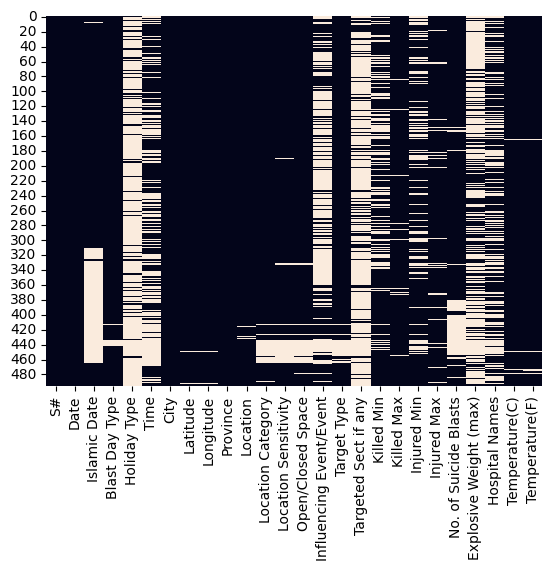

In [5405]:
# veri setinde null değere sahip olanları görsel bir şekilde gösterir
sns.heatmap(data.isnull(), cbar=False)

In [5406]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S#                       496 non-null    int64  
 1   Date                     496 non-null    object 
 2   Islamic Date             342 non-null    object 
 3   Blast Day Type           486 non-null    object 
 4   Holiday Type             72 non-null     object 
 5   Time                     285 non-null    object 
 6   City                     496 non-null    object 
 7   Latitude                 493 non-null    float64
 8   Longitude                493 non-null    object 
 9   Province                 496 non-null    object 
 10  Location                 493 non-null    object 
 11  Location Category        461 non-null    object 
 12  Location Sensitivity     460 non-null    object 
 13  Open/Closed Space        461 non-null    object 
 14  Influencing Event/Event  1

In [5407]:
data.describe()
# count: Toplam veri sayısı (eksik veriler hariç)
# mean: Ortalama değer
# std: Standart sapma
# min: En küçük değer
# 25%: Birinci çeyrek (Q1)
# 50%: Medyan (ikinci çeyrek, Q2)
# 75%: Üçüncü çeyrek (Q3)
# max: En büyük değer

,S#,Latitude,Killed Min,Killed Max,Injured Min,No. of Suicide Blasts,Temperature(C),Temperature(F)
count,496.000000,493.000000,350.000000,480.000000,365.000000,414.000000,491.000000,489.000000
mean,248.500000,32.614705,14.725714,15.206250,31.397260,1.115942,21.111599,69.972579
std,143.327132,2.475917,17.600930,20.270436,38.603842,0.394989,8.369068,15.069622
min,1.000000,24.879503,0.000000,0.000000,0.000000,1.000000,-2.370000,27.734000
25%,124.750000,31.823800,3.000000,3.000000,7.000000,1.000000,14.690000,58.370000
50%,248.500000,33.583300,8.000000,8.000000,20.000000,1.000000,21.405000,70.529000
75%,372.250000,34.004300,20.000000,18.250000,40.000000,1.000000,28.115000,82.499000
max,496.000000,35.383300,125.000000,148.000000,320.000000,4.000000,44.000000,111.000000


In [5408]:
df = data.drop('S#', axis = 1, inplace = False)
# index sutunu zaten var olduğu için  s# sütunun kaldırdık
# axis = 1 : sutun değeri için
# axis = 0 : satır değeri için
# inplace = True : Orjinal veri üzerinde bu işlemi yapar
# inplace = False : Değişiklikleri yeni bir değişkene atar

df.head(2)

,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,...,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,...,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786


In [5409]:
df.shape # yeni dataFrame

(496, 25)

In [5410]:
data.shape # eski dataFrame

(496, 26)

In [5411]:
#firstly lets check how many null values are in Blast Day type Column
print("Number of Null Values in 'Blast Day Type' Column: ", df['Blast Day Type'].isnull().sum())

#Null values in the City Column
print("\nNumber of Null Values in 'City' Column: ", df['City'].isnull().sum())

#Null values in the Province Column
print("\nNumber of Null Values in 'Province' Column: ",df['Province'].isnull().sum())

#Number of Null values in the Location Category Column
print("\nNumber of Null Values in 'Location Category' Column: ", df['Location Category'].isnull().sum())

#Number of Null Values in the Location Senstivity Column
print("\nNumber of Null Values in 'Location Senstivity' Column: ", df['Location Sensitivity'].isnull().sum())

#number of null values in target type
print("\nNumber of Null Values in 'Target Type' Column: ", df['Target Type'].isnull().sum())

#number of null values in Target Sect if any 
print("\nNumber of Null Values in 'Target Sect if any' Column: ", df['Targeted Sect if any'].isnull().sum())

#number of null values in Killed Min
print("\nNumber of Null Values in 'Killed Min' Column: ", df['Killed Min'].isnull().sum())

#number of null values in Killed Max
print("\nNumber of Null Values in 'Killed Max' Column: ", df['Killed Max'].isnull().sum())

#number of null values in Explosive Weight (max)
print("\nNumber of Null Values in 'Explosive Weight (max)' Column: ", df['Explosive Weight (max)'].isnull().sum())

Number of Null Values in 'Blast Day Type' Column:  10

Number of Null Values in 'City' Column:  0

Number of Null Values in 'Province' Column:  0

Number of Null Values in 'Location Category' Column:  35

Number of Null Values in 'Location Senstivity' Column:  36

Number of Null Values in 'Target Type' Column:  26

Number of Null Values in 'Target Sect if any' Column:  399

Number of Null Values in 'Killed Min' Column:  146

Number of Null Values in 'Killed Max' Column:  16

Number of Null Values in 'Explosive Weight (max)' Column:  324


In [5412]:
#finding most repeated category
most_repeated_in_Blast_Day_Type = df['Blast Day Type'].mode()

#model will give us index and value of mode(most repeated category)
print("Most Repeated Category is: ", most_repeated_in_Blast_Day_Type[0])

#replacing nan with it
df['Blast Day Type'] = df['Blast Day Type'].fillna(most_repeated_in_Blast_Day_Type)

#Now number of Null values after replacing Null values 
print("Number of Null Values in 'Blast Day' Column after Replacement: ", df['Blast Day Type'].isnull().sum())

Most Repeated Category is:  Working Day
Number of Null Values in 'Blast Day' Column after Replacement:  10


In [5413]:
df['Blast Day Type'].value_counts()

Blast Day Type
Working Day    403
Holiday         78
Weekend          5
Name: count, dtype: int64

In [5414]:
df['Location Category'].value_counts()

Location Category
Police                        92
Mobile                        70
Military                      70
Religious                     57
Market                        40
Park/Ground                   32
Residence                     25
Government                    19
Hotel                         10
Office Building                9
Foreign                        6
Educational                    6
Hospital                       5
Transport                      5
Bank                           4
Commercial/residence           2
Airport                        1
Civilian                       1
Foreigner                      1
Government/Office Building     1
Government Official            1
foreign                        1
Residential Building           1
                               1
Highway                        1
Name: count, dtype: int64

In [5415]:
df['Location Category'] = df['Location Category'].fillna('Unknown')
df['Location Category'].isna().sum()

0

In [5416]:
#Categories and Value Count of each category in the column
df['Location Sensitivity'].value_counts()
# hing : güvenlik seviyesi çok düşük
# low : Güvenlik seviyesi çok yüksek

Location Sensitivity
High      264
Low       118
Medium     75
low         3
Name: count, dtype: int64

In [5417]:
# df['Location Sensitivity'].isna().sum()
df['Location Sensitivity'].isnull().sum()

# iki method'da aynı işlevi görmektedir.

36

In [5418]:
most_repeated_Location_Senstitvity = df['Location Sensitivity'].mode()[0]
#replacing null values
df['Location Sensitivity'] = df['Location Sensitivity'].fillna(most_repeated_Location_Senstitvity)
#after replacing
print("Number of Null values in the Location Senstivity Column after replacement: ",df['Location Sensitivity'].isna().sum() )

Number of Null values in the Location Senstivity Column after replacement:  0


In [5419]:
df['Location Sensitivity'].value_counts()

Location Sensitivity
High      300
Low       118
Medium     75
low         3
Name: count, dtype: int64

In [5420]:
df[df['Location Sensitivity'] == 'low'] 

,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
237,Friday-January 8-2010,22 MuHarram 1431 A.H,Working Day,NaN,NaN,Khyber Agency,34.0211,71.2874,KPK,at the gate of the headquarters of the militan...,...,NaN,NaN,8.0,NaN,11,1.0,NaN,NaN,11.330,52.394
333,Wednesday-November 16-2011,NaN,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,Sea view-clifton-at lover's point adjacent to ...,...,NaN,5.0,7.0,NaN,1,1.0,NaN,Jinnah Postgraduate Medical Center,25.305,77.549
334,Friday-November 18-2011,NaN,Working Day,NaN,3:38AM,Karachi,24.9918,66.9911,Sindh,Block 13-near Pehlwan Goth roundabout-Gulistan...,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,Jinnah Postgraduate Medical Center,27.245,81.041


In [5421]:
#we will rename low with Low
df['Location Sensitivity'] = df['Location Sensitivity'].replace({'low':'Low'})
df['Location Sensitivity'].value_counts()

Location Sensitivity
High      300
Low       121
Medium     75
Name: count, dtype: int64

In [5422]:
df['Target Type'].isna().sum()

26

In [5423]:
df['Target Type'].value_counts()

Target Type
Military               116
Police                 114
Civilian                72
Government Official     44
Religious               36
Anti-Militants          26
Foreigner               14
civilian                12
Government official      8
religious                7
foreigner                3
police                   3
Media                    2
Army                     2
Shia sect                2
Children/Women           1
Unknown                  1
Rangers                  1
Police & Rangers         1
Civilian & Police        1
Frontier Corps           1
advocates (lawyers)      1
Civilian Judges          1
Judges & lawyers         1
Name: count, dtype: int64

In [5424]:
# Find the top 3 most repeated categories
top_categories = df['Target Type'].value_counts().head(3).index.tolist()
top_categories

['Military', 'Police', 'Civilian']

In [5425]:
# Function to fill NaN with a random choice from the top 3 categories
def fill_nan_with_random_category(Target_Type):
    #if we face null value in Target_Type Col
    if pd.isna(Target_Type):
        #replace it randomly with any entery from top_categories
        return np.random.choice(top_categories)
    else:
        return Target_Type

In [5426]:
# Apply the function to fill NaN values
df['Target Type'] = df['Target Type'].apply(fill_nan_with_random_category)

df['Target Type'].value_counts()

Target Type
Military               125
Police                 122
Civilian                81
Government Official     44
Religious               36
Anti-Militants          26
Foreigner               14
civilian                12
Government official      8
religious                7
foreigner                3
police                   3
Media                    2
Army                     2
Shia sect                2
Children/Women           1
Unknown                  1
Rangers                  1
Police & Rangers         1
Civilian & Police        1
Frontier Corps           1
advocates (lawyers)      1
Civilian Judges          1
Judges & lawyers         1
Name: count, dtype: int64

In [5427]:
#checking null values now.
df['Target Type'].isna().sum()

0

In [5428]:
df['Killed Max'].isna().sum()

16

In [5429]:
mean_killed_max = df['Killed Max'].mean()
print("Mean: ", mean_killed_max)

Mean:  15.20625


In [5430]:
df['Killed Max'] = df['Killed Max'].fillna(mean_killed_max)

#null values after filling
df['Killed Max'].isna().sum()

0

<Axes: >

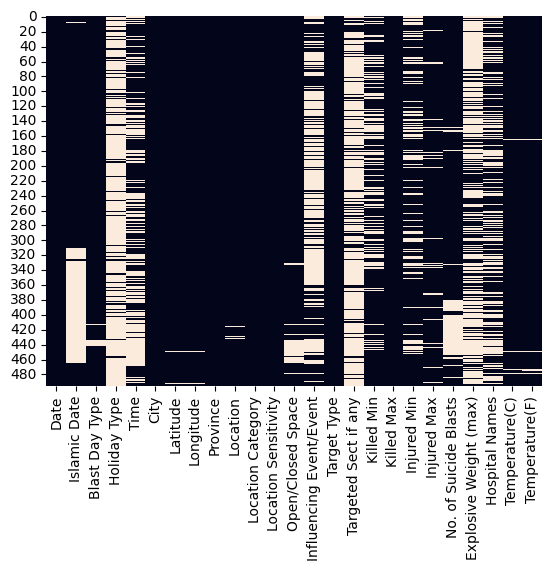

In [5431]:
sns.heatmap(df.isnull(), cbar=False)


In [5432]:
df.isna().sum()

Date                         0
Islamic Date               154
Blast Day Type              10
Holiday Type               424
Time                       211
City                         0
Latitude                     3
Longitude                    3
Province                     0
Location                     3
Location Category            0
Location Sensitivity         0
Open/Closed Space           35
Influencing Event/Event    305
Target Type                  0
Targeted Sect if any       399
Killed Min                 146
Killed Max                   0
Injured Min                131
Injured Max                 32
No. of Suicide Blasts       82
Explosive Weight (max)     324
Hospital Names             199
Temperature(C)               5
Temperature(F)               7
dtype: int64

In [5433]:
# get all the unique values in the 'City' column
cities = df['City'].unique()

# sort them alphabetically and then take a closer look
cities.sort()
cities

array(['ATTOCK', 'Attock ', 'Bajaur Agency', 'Bannu', 'Bhakkar ', 'Buner',
       'Chakwal ', 'Chaman', 'Charsadda', 'Charsadda ', 'D. I Khan',
       'D.G Khan', 'D.G Khan ', 'D.I Khan', 'D.I Khan ', 'Dara Adam Khel',
       'Dara Adam khel', 'Fateh Jang', 'Ghallanai, Mohmand Agency ',
       'Gujrat', 'Hangu', 'Haripur', 'Hayatabad', 'Islamabad',
       'Islamabad ', 'Jacobabad', 'KURRAM AGENCY', 'Karachi', 'Karachi ',
       'Karak', 'Khanewal', 'Khuzdar', 'Khyber Agency', 'Khyber Agency ',
       'Kohat', 'Kohat ', 'Kuram Agency ', 'Lahore', 'Lahore ',
       'Lakki Marwat', 'Lakki marwat', 'Lasbela', 'Lower Dir', 'MULTAN',
       'Malakand ', 'Mansehra', 'Mardan', 'Mohmand Agency',
       'Mohmand Agency ', 'Mohmand agency', 'Mosal Kor, Mohmand Agency',
       'Multan', 'Muzaffarabad', 'North Waziristan', 'North waziristan',
       'Nowshehra', 'Orakzai Agency', 'Peshawar', 'Peshawar ', 'Pishin',
       'Poonch', 'Quetta', 'Quetta ', 'Rawalpindi', 'Sargodha',
       'Sehwan town',

In [5434]:
# convert to lower case
df['City'] = df['City'].str.lower()
# remove trailing white spaces
df['City'] = df['City'].str.strip()

In [5435]:
provinces = df['Province'].unique()

provinces.sort()
provinces

array(['AJK', 'Balochistan', 'Baluchistan', 'Capital', 'FATA', 'Fata',
       'KPK', 'Punjab', 'Sindh'], dtype=object)

In [5436]:
# convert to lower case
df['Province'] = df['Province'].str.lower()
# remove trailing white spaces
df['Province'] = df['Province'].str.strip()
print(df['Province'].unique())

['capital' 'sindh' 'baluchistan' 'punjab' 'fata' 'kpk' 'ajk' 'balochistan']


In [5437]:
# get the top 10 closest matches to "d.i khan"
matches = fuzzywuzzy.process.extract("d.i khan", cities, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('D. I Khan', 100),
 ('D.I Khan', 100),
 ('D.I Khan ', 100),
 ('D.G Khan', 88),
 ('D.G Khan ', 88),
 ('Khanewal', 50),
 ('Sudhanoti', 47),
 ('Hangu', 46),
 ('Kohat', 46),
 ('Kohat ', 46)]

In [5438]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [5439]:
# use the function we just wrote to replace close matches to "d.i khan" with "d.i khan"
replace_matches_in_column(df=df, column='City', string_to_match="d.i khan")

All done!


In [5440]:
replace_matches_in_column(df=df, column='City', string_to_match="kuram agency")

All done!


In [5441]:
# Belirli değerleri standart hale getirmek
df['Province'] = df['Province'].replace({'baluchistan': 'balochistan'})

print(df['Province'].unique())

['capital' 'sindh' 'balochistan' 'punjab' 'fata' 'kpk' 'ajk']


In [5442]:
#finding the Category of Blast Day Type with max value
df['Blast Day Type'].value_counts()

Blast Day Type
Working Day    403
Holiday         78
Weekend          5
Name: count, dtype: int64

In [5443]:
# The challenge here is to transform str to dates. I haven'ts seen other kagglers to do this time-consuming task. Not to worry. Let's solve it at once. 
# Let's simplify it for taking the next step

df['Date'] = df['Date'].str.replace(r'\b(Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday)\b', '', regex=True)
df['Date'] = df['Date'].str.replace('-', ' ')

In [5444]:
# Now let's crush it with mighty function
parsed_dates = []
for date_str in df['Date']:
    try:
        parsed_date = parser.parse(date_str)
        parsed_dates.append(parsed_date)
    except ValueError:
        parsed_dates.append(None)  

df['Date'] = parsed_dates

In [5445]:
df['Date'] = df['Date'].astype(str)
df['date_length'] = df['Date'].str.len()
value_counts_by_length = df['date_length'].value_counts()
print(value_counts_by_length)

date_length
10    495
3       1
Name: count, dtype: int64


In [5446]:
df = df[df['date_length'] != 3]
df.drop(columns=['date_length'], inplace=True)

In [5447]:
if df['Date'].isnull().any():
    print("There are some dates that couldn't be parsed correctly.")
else:
    if (df['Date'].astype(str).str.len() != 10).any():
        print("There are some dates with incorrect length.")
    else:
        print("All dates are in the correct format and have the correct length 💅✅")

All dates are in the correct format and have the correct length 💅✅


In [5448]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

In [5449]:
columns_to_drop = ['Time', 'Explosive Weight (max)', 'Hospital Names', 'Temperature(C)', 'Temperature(F)', 'Influencing Event/Event', 'Targeted Sect if any']
df = df.drop(columns=columns_to_drop)

In [5450]:
df.head()

,Date,Islamic Date,Blast Day Type,Holiday Type,City,Latitude,Longitude,Province,Location,Location Category,Location Sensitivity,Open/Closed Space,Target Type,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Year
0,1995-11-19,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,islamabad,33.7180,73.0718,capital,Egyptian Embassy,Foreign,High,Closed,Foreigner,14.0,15.0,NaN,60,2.0,1995
1,2000-11-06,10 SHa`baan 1421 A.H,Working Day,NaN,karachi,24.9918,66.9911,sindh,office of Nawa-e-Waqt,Office Building,Low,Closed,Media,NaN,3.0,NaN,3,1.0,2000
2,2002-05-08,25 safar 1423 A.H,Working Day,NaN,karachi,24.9918,66.9911,sindh,Pakistan Navy bus Parked outside Five Star She...,Hotel,Medium,Closed,Foreigner,13.0,15.0,20.0,40,1.0,2002
3,2002-06-14,3 Raby` al-THaany 1423 A.H,Working Day,NaN,karachi,24.9918,66.9911,sindh,US Consulate Civil Lines Area,Foreign,High,Closed,Foreigner,NaN,12.0,NaN,51,1.0,2002
4,2003-07-04,4 Jumaada al-awal 1424 A.H,Working Day,NaN,quetta,30.2095,67.0182,balochistan,Imambargah MeCongy Road Quetta,Religious,Medium,Closed,Religious,44.0,47.0,NaN,65,1.0,2003


In [5451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 495
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   495 non-null    datetime64[ns]
 1   Islamic Date           342 non-null    object        
 2   Blast Day Type         485 non-null    object        
 3   Holiday Type           72 non-null     object        
 4   City                   495 non-null    object        
 5   Latitude               492 non-null    float64       
 6   Longitude              492 non-null    object        
 7   Province               495 non-null    object        
 8   Location               492 non-null    object        
 9   Location Category      495 non-null    object        
 10  Location Sensitivity   495 non-null    object        
 11  Open/Closed Space      461 non-null    object        
 12  Target Type            495 non-null    object        
 13  Killed Min

In [5452]:
df = df.drop('Holiday Type', axis = 1, inplace = False)

In [5453]:
# Miladi tarihleri datetime64 tipine dönüştür
miladiDate = pd.to_datetime(df['Date'], errors='coerce')

# Miladi tarihlerini Hicri tarihlerine çevir
hicriDates = [convert.Gregorian(date.year, date.month, date.day).to_hijri() for date in miladiDate if not pd.isnull(date)]

# Hicri tarihlerini string formatına dönüştür
hicriDates_strings = [f"{hicri_date.year}-{hicri_date.month}-{hicri_date.day}" for hicri_date in hicriDates]

print(hicriDates_strings)

['1416-6-26', '1421-8-10', '1423-2-25', '1423-4-3', '1424-5-4', '1424-11-2', '1425-1-8', '1425-3-18', '1425-4-12', '1425-4-15', '1425-6-11', '1425-6-13', '1425-8-17', '1425-8-26', '1426-2-9', '1426-3-19', '1426-4-19', '1426-4-22', '1427-1-10', '1427-2-2', '1427-3-14', '1427-5-6', '1427-5-30', '1427-7-12', '1427-10-17', '1427-10-26', '1427-11-12', '1428-1-3', '1428-1-7', '1428-1-8', '1428-1-10', '1428-1-15', '1428-1-15', '1428-1-18', '1428-1-29', '1428-3-10', '1428-4-11', '1428-4-28', '1428-5-11', '1428-6-19', '1428-6-27', '1428-6-27', '1428-6-29', '1428-7-1', '1428-7-1', '1428-7-3', '1428-7-3', '1428-7-5', '1428-7-5', '1428-7-5', '1428-7-6', '1428-7-13', '1428-7-20', '1428-7-21', '1428-8-4', '1428-8-6', '1428-8-6', '1428-8-7', '1428-8-11', '1428-8-13', '1428-8-19', '1428-8-19', '1428-8-22', '1428-8-22', '1428-8-29', '1428-9-1', '1428-9-10', '1428-9-19', '1428-10-6', '1428-10-13', '1428-10-18', '1428-10-20', '1428-10-28', '1428-11-14', '1428-11-14', '1428-11-24', '1428-11-29', '1428-11-

In [5454]:
# Eksik değerleri içeren satırları düşürerek DataFrame'i güncelleyin
df.dropna(subset=['Date'], inplace=True)

# 'Islamic Date' sütununu DataFrame'e ekleyin
df['Islamic Date'] = hicriDates_strings

In [5455]:
# En çok tekrar eden değeri bulma
most_common_value = df['Blast Day Type'].mode()[0]

# Boş sütunlara atama
df['Blast Day Type'].fillna(most_common_value, inplace=True)

In [5456]:
df.dropna(subset=['Latitude'], inplace=True)
df.dropna(subset=['Longitude'], inplace=True)
df.dropna(subset=['Location'], inplace=True)

In [5457]:
df['Open/Closed Space'] = df['Open/Closed Space'].replace({'open':'Open'})
df['Open/Closed Space'] = df['Open/Closed Space'].replace({'Open ':'Open'})
df['Open/Closed Space'] = df['Open/Closed Space'].replace({'closed':'Closed'})
df['Open/Closed Space'] = df['Open/Closed Space'].replace({'Open/Closed':'Open'})

In [5458]:
df['Open/Closed Space'].fillna('Open', inplace=True)

df['Open/Closed Space'].isna().sum()

0

In [5459]:
df['Open/Closed Space'].unique()

array(['Closed', 'Open'], dtype=object)

In [5460]:
df['Open/Closed Space'].value_counts()

Open/Closed Space
Open      362
Closed    127
Name: count, dtype: int64

In [5461]:
df['Killed Min'] = df['Killed Min'].fillna(df['Killed Min'].mean())

In [5462]:
df['Injured Min'] = df['Injured Min'].fillna(df['Injured Min'].mean())

In [5463]:
df['Injured Max'] = pd.to_numeric(df['Injured Max'], errors='coerce')

In [5464]:
df['Injured Max'] = df['Injured Max'].fillna(df['Injured Max'].mean())

In [5465]:
df['No. of Suicide Blasts'] = df['No. of Suicide Blasts'].fillna(df['No. of Suicide Blasts'].mean())

In [5466]:
# Yıl, ay ve gün sütunlarını oluştur
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [5467]:
df[['Islamic Year', 'Islamic Month', 'Islamic Day']] = df['Islamic Date'].str.split('-', expand=True)

In [5468]:
df['Location Category'] = df['Location Category'].replace({'foreign':'Foreign'})

In [5469]:
df['Target Type'] = df['Target Type'].replace({'police':'Police'})
df['Target Type'] = df['Target Type'].replace({'Unknown':'Police'})
df['Target Type'] = df['Target Type'].replace({'foreigner':'Foreigner'})
df['Target Type'] = df['Target Type'].replace({'religious':'Religious'})
df['Target Type'] = df['Target Type'].replace({'civilian':'Civilian'})
df['Target Type'] = df['Target Type'].replace({'Government official':'Government Official'})
df['Target Type'] = df['Target Type'].replace({'Police & Rangers':'Police'})
df['Target Type'] = df['Target Type'].replace({'Rangers':'Police'})
df['Target Type'] = df['Target Type'].replace({'Civilian Judges':'Civilian'})
df['Target Type'] = df['Target Type'].replace({'Civilian & Police':'Civilian'})
df['Target Type'] = df['Target Type'].replace({'Children/Women':'Civilian'})
df['Target Type'] = df['Target Type'].replace({'Judges & lawyers':'Civilian'})
df['Target Type'] = df['Target Type'].replace({'advocates (lawyers)':'Civilian'})
df['Target Type'] = df['Target Type'].replace({'Frontier Corps ':'Military'})
df['Target Type'] = df['Target Type'].replace({'Army':'Military'})

In [5470]:
df["Blast Day Type"] = df["Blast Day Type"].astype('category')
df["City"] = df["City"].astype('category')
df["Longitude"] = df["Longitude"].astype(float)
df["Province"] = df["Province"].astype('category')
df["Location"] = df["Location"].astype(str)
df["Location Category"] = df["Location Category"].astype('category')
df["Location Sensitivity"] = df["Location Sensitivity"].astype('category')
df["Open/Closed Space"] = df["Open/Closed Space"].astype('category')
df["Target Type"] = df["Target Type"].astype('category')
df["Islamic Year"] = df["Islamic Year"].astype(int)
df["Islamic Month"] = df["Islamic Month"].astype(int)
df["Islamic Day"] = df["Islamic Day"].astype(int)

In [5471]:
label_encoder = LabelEncoder()
df["Blast Day Type Num"] = label_encoder.fit_transform(df["Blast Day Type"])
df["City Num"] = label_encoder.fit_transform(df["City"])
df["Province Num"] = label_encoder.fit_transform(df["Province"])
df["Location Category Num"] = label_encoder.fit_transform(df["Location Category"])
df["Location Sensitivity Num"] = label_encoder.fit_transform(df["Location Sensitivity"])
df["Open/Closed Space Num"] = label_encoder.fit_transform(df["Open/Closed Space"])
df["Target Type Num"] = label_encoder.fit_transform(df["Target Type"])

In [5472]:
df = df.drop(columns={'Islamic Date', 'Date', 'City', 'Province', 'Blast Day Type', 'Location Category', 'Location Sensitivity', 'Open/Closed Space', 'Target Type', 'Location'})

<Axes: >

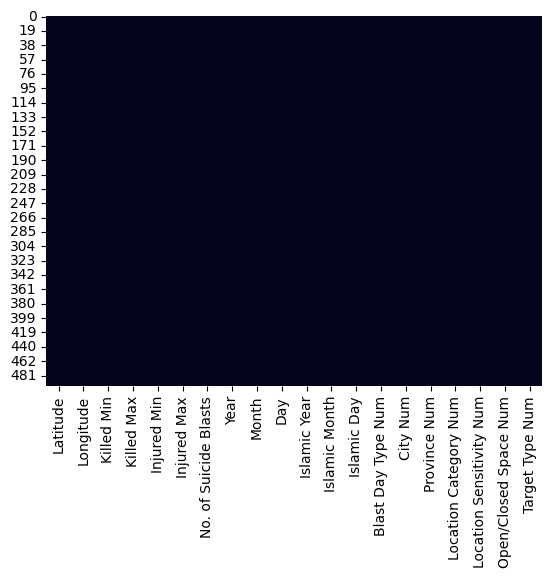

In [5473]:
sns.heatmap(df.isnull(), cbar=False)

In [5474]:
df

,Latitude,Longitude,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Year,Month,Day,Islamic Year,Islamic Month,Islamic Day,Blast Day Type Num,City Num,Province Num,Location Category Num,Location Sensitivity Num,Open/Closed Space Num,Target Type Num
0,33.718000,73.071800,14.000000,15.0,31.578947,60.000000,2.0,1995,11,19,1416,6,26,0,17,2,6,0,0,2
1,24.991800,66.991100,14.970845,3.0,31.578947,3.000000,1.0,2000,11,6,1421,8,10,2,19,6,16,1,0,4
2,24.991800,66.991100,13.000000,15.0,20.000000,40.000000,1.0,2002,5,8,1423,2,25,2,19,6,12,2,0,2
3,24.991800,66.991100,14.970845,12.0,31.578947,51.000000,1.0,2002,6,14,1423,4,3,2,19,6,6,0,0,2
4,30.209500,67.018200,44.000000,47.0,31.578947,65.000000,1.0,2003,7,4,1424,5,4,2,42,1,19,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,30.203658,67.004469,15.000000,15.0,40.000000,40.000000,1.0,2017,8,12,1438,11,20,1,42,1,23,2,1,5
491,28.571051,67.496895,21.000000,22.0,25.000000,39.721491,1.0,2017,10,5,1439,1,15,2,42,1,19,0,1,1
493,30.221057,67.002524,2.000000,2.0,8.000000,8.000000,1.0,2017,11,9,1439,2,20,2,42,1,18,1,1,6
494,33.970623,71.438620,1.000000,3.0,6.000000,8.000000,1.0,2017,11,24,1439,3,6,2,39,4,18,1,1,6


In [5475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 489 entries, 0 to 495
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Latitude                  489 non-null    float64
 1   Longitude                 489 non-null    float64
 2   Killed Min                489 non-null    float64
 3   Killed Max                489 non-null    float64
 4   Injured Min               489 non-null    float64
 5   Injured Max               489 non-null    float64
 6   No. of Suicide Blasts     489 non-null    float64
 7   Year                      489 non-null    int32  
 8   Month                     489 non-null    int32  
 9   Day                       489 non-null    int32  
 10  Islamic Year              489 non-null    int32  
 11  Islamic Month             489 non-null    int32  
 12  Islamic Day               489 non-null    int32  
 13  Blast Day Type Num        489 non-null    int32  
 14  City Num       

In [5476]:
df.to_csv('CleanData.csv')

In [5477]:
[
    'Latitude', 'Longitude', 'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
    'No. of Suicide Blasts', 'Year', 'Month', 'Day', 'Islamic Year', 'Islamic Month',
    'Islamic Day', 'Blast Day Type Num', 'City Num', 'Province Num', 'Location Category Num',
    'Location Sensitivity Num', 'Open/Closed Space Num', 'Target Type Num'
]

['Latitude',
 'Longitude',
 'Killed Min',
 'Killed Max',
 'Injured Min',
 'Injured Max',
 'No. of Suicide Blasts',
 'Year',
 'Month',
 'Day',
 'Islamic Year',
 'Islamic Month',
 'Islamic Day',
 'Blast Day Type Num',
 'City Num',
 'Province Num',
 'Location Category Num',
 'Location Sensitivity Num',
 'Open/Closed Space Num',
 'Target Type Num']

In [5478]:
# Modeller
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

# İlgili hesaplamalar
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix

Killed Min
Mean Squared Error: 108.86071187290764
R-Squared: 0.7224191426065805
Mean Absolute Error: 5.585142797643839


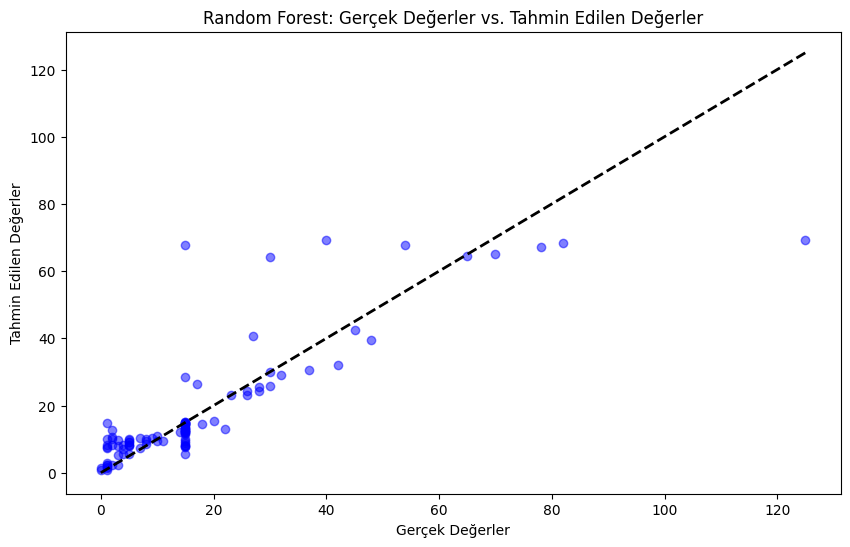

In [5479]:
print("Killed Min")

column_names = [
    'Latitude', 'Longitude', 'Killed Max', 'Injured Min', 'Injured Max',
    'No. of Suicide Blasts', 'Year', 'Month', 'Day', 'Islamic Year', 'Islamic Month',
    'Islamic Day', 'Blast Day Type Num', 'City Num', 'Province Num', 'Location Category Num',
    'Location Sensitivity Num', 'Open/Closed Space Num', 'Target Type Num'
]

X = df[column_names]
y = df['Killed Min']

# Veri setini eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rastgele Orman Regresyon modelini oluştur ve eğit
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Modeli test et ve tahminleri yap
y_pred = model.predict(X_test)

# Model performansını değerlendir
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared:", r2)
print("Mean Absolute Error:", mae)

# Gerçek ve tahmin edilen değerler arasındaki ilişkiyi gösteren bir scatter plot çiz
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Random Forest: Gerçek Değerler vs. Tahmin Edilen Değerler')
plt.show()

Killed Max
Mean Squared Error: 286.34869571906887
R-Squared: 0.6493979608800395
Mean Absolute Error: 6.618279336734694


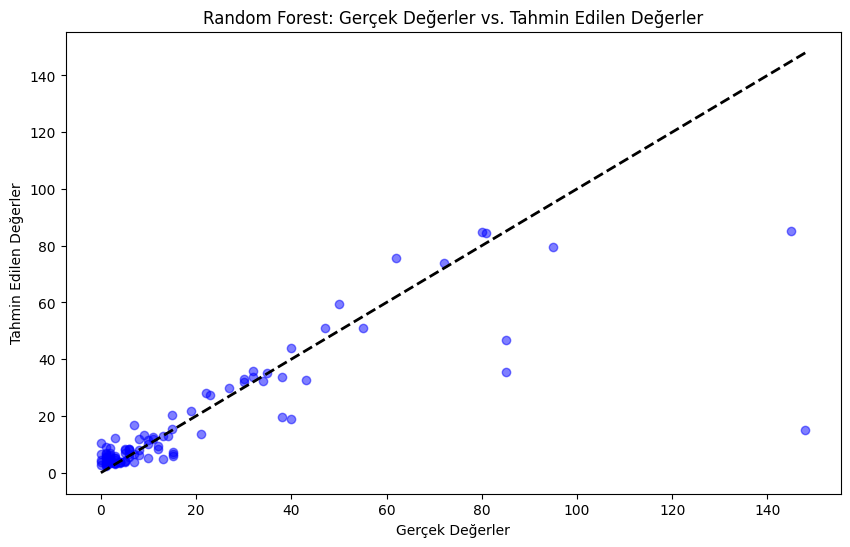

In [5480]:
print("Killed Max")

column_names = [
    'Latitude', 'Longitude', 'Killed Min', 'Injured Min', 'Injured Max',
    'No. of Suicide Blasts', 'Year', 'Month', 'Day', 'Islamic Year', 'Islamic Month',
    'Islamic Day', 'Blast Day Type Num', 'City Num', 'Province Num', 'Location Category Num',
    'Location Sensitivity Num', 'Open/Closed Space Num', 'Target Type Num'
]

X = df[column_names]
y = df['Killed Max']

# Veri setini eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rastgele Orman Regresyon modelini oluştur ve eğit
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Modeli test et ve tahminleri yap
y_pred = model.predict(X_test)

# Model performansını değerlendir
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared:", r2)
print("Mean Absolute Error:", mae)

# Gerçek ve tahmin edilen değerler arasındaki ilişkiyi gösteren bir scatter plot çiz
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Random Forest: Gerçek Değerler vs. Tahmin Edilen Değerler')
plt.show()

Injured Min
Mean Squared Error: 447.50093689581087
R-Squared: 0.6387983007700792
Mean Absolute Error: 12.613818474758318


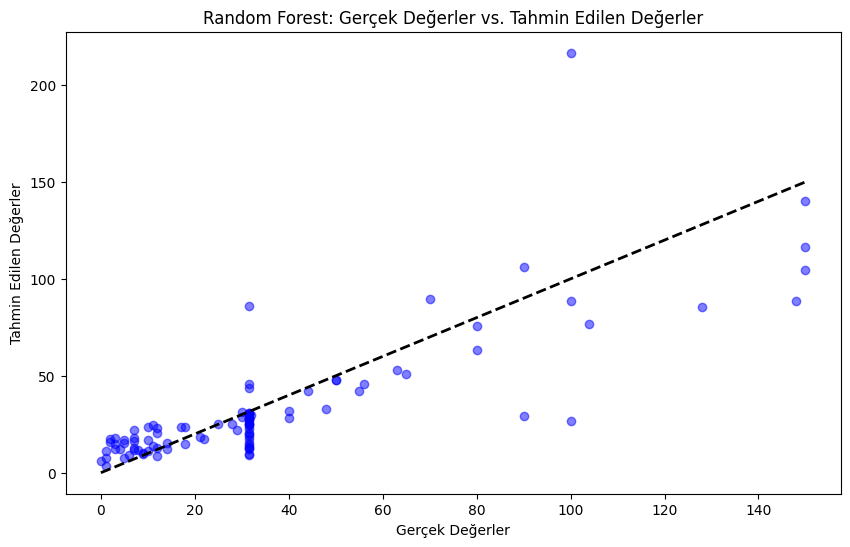

In [5481]:
print("Injured Min")

column_names = [
    'Latitude', 'Longitude', 'Killed Min', 'Killed Max', 'Injured Max',
    'No. of Suicide Blasts', 'Year', 'Month', 'Day', 'Islamic Year', 'Islamic Month',
    'Islamic Day', 'Blast Day Type Num', 'City Num', 'Province Num', 'Location Category Num',
    'Location Sensitivity Num', 'Open/Closed Space Num', 'Target Type Num'
]

X = df[column_names]
y = df['Injured Min']

# Veri setini eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rastgele Orman Regresyon modelini oluştur ve eğit
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Modeli test et ve tahminleri yap
y_pred = model.predict(X_test)

# Model performansını değerlendir
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared:", r2)
print("Mean Absolute Error:", mae)

# Gerçek ve tahmin edilen değerler arasındaki ilişkiyi gösteren bir scatter plot çiz
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Random Forest: Gerçek Değerler vs. Tahmin Edilen Değerler')
plt.show()

Injured Max
Mean Squared Error: 2014.788758270961
R-Squared: 0.6064941990243279
Mean Absolute Error: 17.774207841031146


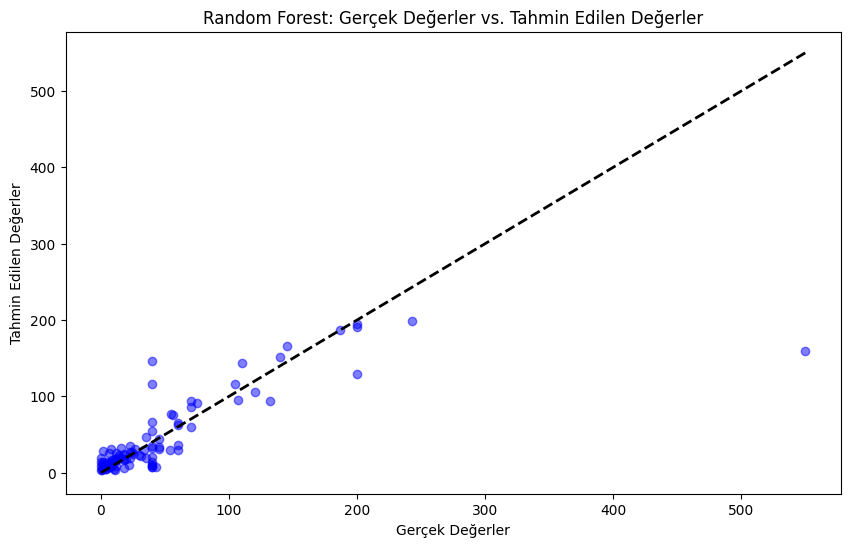

In [5482]:
print("Injured Max")

column_names = [
    'Latitude', 'Longitude', 'Killed Min', 'Killed Max', 'Injured Min',
    'No. of Suicide Blasts', 'Year', 'Month', 'Day', 'Islamic Year', 'Islamic Month',
    'Islamic Day', 'Blast Day Type Num', 'City Num', 'Province Num', 'Location Category Num',
    'Location Sensitivity Num', 'Open/Closed Space Num', 'Target Type Num'
]

X = df[column_names]
y = df['Injured Max']

# Veri setini eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rastgele Orman Regresyon modelini oluştur ve eğit
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Modeli test et ve tahminleri yap
y_pred = model.predict(X_test)

# Model performansını değerlendir
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared:", r2)
print("Mean Absolute Error:", mae)

# Gerçek ve tahmin edilen değerler arasındaki ilişkiyi gösteren bir scatter plot çiz
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Random Forest: Gerçek Değerler vs. Tahmin Edilen Değerler')
plt.show()